In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving wind.csv to wind.csv


### Data Retrieved from: https://www.kaggle.com/synergystud/a-fine-windy-day-hackerearth-ml-challenge

In [6]:
df = pd.read_csv('wind.csv')

## Data Summary

1. datetime - a string reperesenting the time snapshot when the data was collected
2. wind_speed - a measure of how fast the wind was going in meters per second
3. atmospheric_temperature - ambient temperature in celcius
4. shaft_temperature - the temperature of the windmill shaft in celcius
5. blades_angle - angle of blades in relation to the windstream in degrees
6. gearbox_temperature - the temperature of the windmill gearbox
7. engine_temperature - the temperature of the windmill engine.
8. motor_torque - the torque exerted on the motor in Newton meters
9. generator_temperature - the temperature of the gemerator
10. atmospheric_pressure - the outside pressure measured in pascals
11. area_temperature - the measured temperature around the windmill
12. windmill_body_temperature - the temperature of the windmill body in celcius
13. wind_direction - the direction the wind is pointing in degrees
14. resistance - the electrical resistance of the windmill measured in degrees
15. rotor_torque - the torque exerted by the rotor in Newton meters
16. turbine_status - Unspecified, assumed to be physics condition of the windmill
17. cloud_level - categorical and ordinal description of the cloud level
18. blade_length - the length of the windmill blades in meters
19. blade_bredth - the total bredth of the windmill blades
20. windmill_height - the height of the windmill
21. windmill_generated_power - the power generated by the windmill in kW/h

## Questions

This note book seeks to answer two questions:
* Can the power generated by the windmill be predicted using the provided data?
* Which of the features contributes the most to the genearted power?

In [15]:
df.tracking_id.value_counts().sort_values()

WM_19290    1
WM_17325    1
WM_7247     1
WM_5814     1
WM_10195    1
           ..
WM_28634    1
WM_4768     1
WM_10074    1
WM_29176    1
WM_18859    1
Name: tracking_id, Length: 28200, dtype: int64

From this we can see that each instance of a windmill is unique so only a single data point was taken from each windmill.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

All of the data appear to be of the proper datatype. The only exception being the datetime property. We convert this below.

In [20]:
df.datetime = pd.to_datetime(df.datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tracking_id                     28200 non-null  object        
 1   datetime                        28200 non-null  datetime64[ns]
 2   wind_speed(m/s)                 27927 non-null  float64       
 3   atmospheric_temperature(°C)     24750 non-null  float64       
 4   shaft_temperature(°C)           28198 non-null  float64       
 5   blades_angle(°)                 27984 non-null  float64       
 6   gearbox_temperature(°C)         28199 non-null  float64       
 7   engine_temperature(°C)          28188 non-null  float64       
 8   motor_torque(N-m)               28176 non-null  float64       
 9   generator_temperature(°C)       28188 non-null  float64       
 10  atmospheric_pressure(Pascal)    25493 non-null  float64       
 11  ar

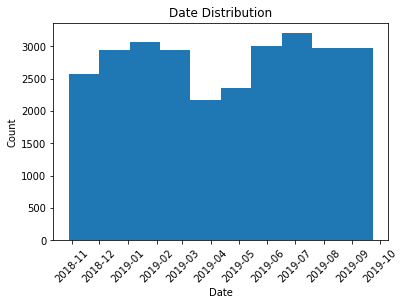

In [28]:
plt.hist(df.datetime)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Date Distribution')
plt.show()

From this graph we can see that the measurements were taken over a period of one year, with slightly fewer being taken during the spring.

In [ ]:
df.shape

(28200, 22)

In [ ]:
df.isna().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

Here we can see that there are a good number of na values throughout the data. Before we perform any regression on this we will need to address this.

In [ ]:
# deleting columns to make plotting easier
del df['tracking_id']
del df['datetime']
del df['cloud_level']
del df['turbine_status']

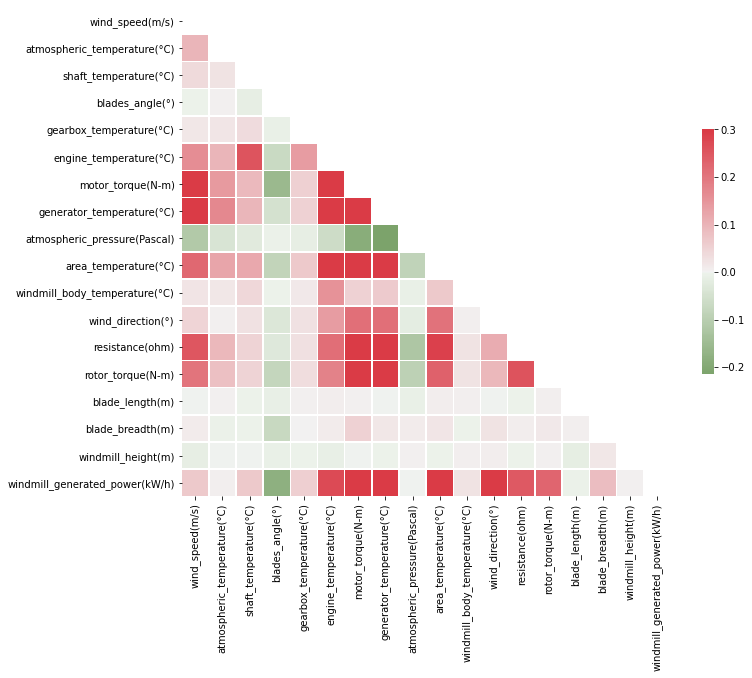

In [ ]:
# Used example code from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

import seaborn as sns
# Compute the correlation matrix
corr = abs(df).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

My first assumption was that the windspeed would have a fairly high correlation with the power generated. However, this graph shows that is clearly not the case. I took the absolute power of the wind speed because there were a large number of negative values which just means the measurement was taken backwards(see: https://www.quora.com/Why-does-a-power-analyzer-show-negative-KW?share=1)

In [ ]:
abs(df['wind_speed(m/s)']).corr(df['windmill_generated_power(kW/h)'])

0.06830141137468228

Printed the corralation to confirm it is very low.